In [1]:
import numpy as np

def veletlen_bolyongas(
    kezdo_pont: float, 
    ido: float,
    utvonal_szam: int = 10000,
    p: float = 0.5
) -> list:
    """
    A véletlen bolyongás szimulálása során egy diszkrét időben zajló folyamatot modellezünk, 
    ahol minden lépésnél az érték egy egységgel növekszik vagy csökken, 
    egyenlő valószínűséggel (50%-os eséllyel). 
    Ez a klasszikus véletlen bolyongás (random walk) modell.

    Args:
      kezdo_pont: honnan kezdjük a bolyongást
      ido: milyen hosszú a bolyongás
      utvonal_szam: mennyi bolyongást szimulálunk
      
    Returns:
      szimulált bolyongások 
    """

    bolyongasok = []
    # egy útvonal
    for _ in range(utvonal_szam):
        ez_az_ut = [kezdo_pont]
        for t in range(ido):
            # véletlenszerű lépés iránya
            dB = 1-2*np.random.binomial(1, 1-p)
            # lépünk
            dS_S = ez_az_ut[-1]+dB
            ez_az_ut.append(dS_S)
        bolyongasok.append(ez_az_ut)

    return bolyongasok

In [2]:
bolyongasok = np.array([[1,2,3,1],[1,2,1,2],[1,5,1,0]])
C = 3
np.any(bolyongasok >= C, axis=1)
pozicio = np.where(bolyongasok >= C)
for i in range(len(pozicio[0])):
    sor = pozicio[0][i]
    oszlop = pozicio[1][i]
    bolyongasok[sor, oszlop:] = C


In [11]:
def szerencsejatekos_vagyona(bolyongasok, K: float, C: float):
    """
    Szerencsejátékos csődje

    Args:
      * bolyongasok: a szimulált útvonalak
      * C: amikor nyerünk (Cél)
      * K: amikor vesztünk (Kiszállás)
    
    """
    csod = 0
    nyeres = 0
    uj_bolyongasok = []
    for ut in bolyongasok:
        ut = np.array(ut.copy())
        end = -1
        for idx in range(len(ut)):
            if ut[idx] >= C:
                ut[idx:] = C
                nyeres += 1
                break
            elif ut[idx] <= K:
                ut[idx:] = K
                csod += 1
                break
        uj_bolyongasok.append(ut)
    return csod/len(uj_bolyongasok), nyeres/len(uj_bolyongasok), uj_bolyongasok

# mennyi vagyonnal indulunk
x = 10
# milyen hosszan játszunk
ido = 20
# mikor megyünk csődbe
K = 5
# mikor hagyjuk abba a játékot mert elégedettek vagyunk a nyereménnyel
C = 18
# véletlen bolyongások szimulálása
bolyongasok = veletlen_bolyongas(kezdo_pont=x, ido=ido, utvonal_szam=10000)
csod, nyeres, uj_bolyongasok = szerencsejatekos_vagyona(bolyongasok, K=K, C=C)
print(csod, nyeres)

0.269 0.0761


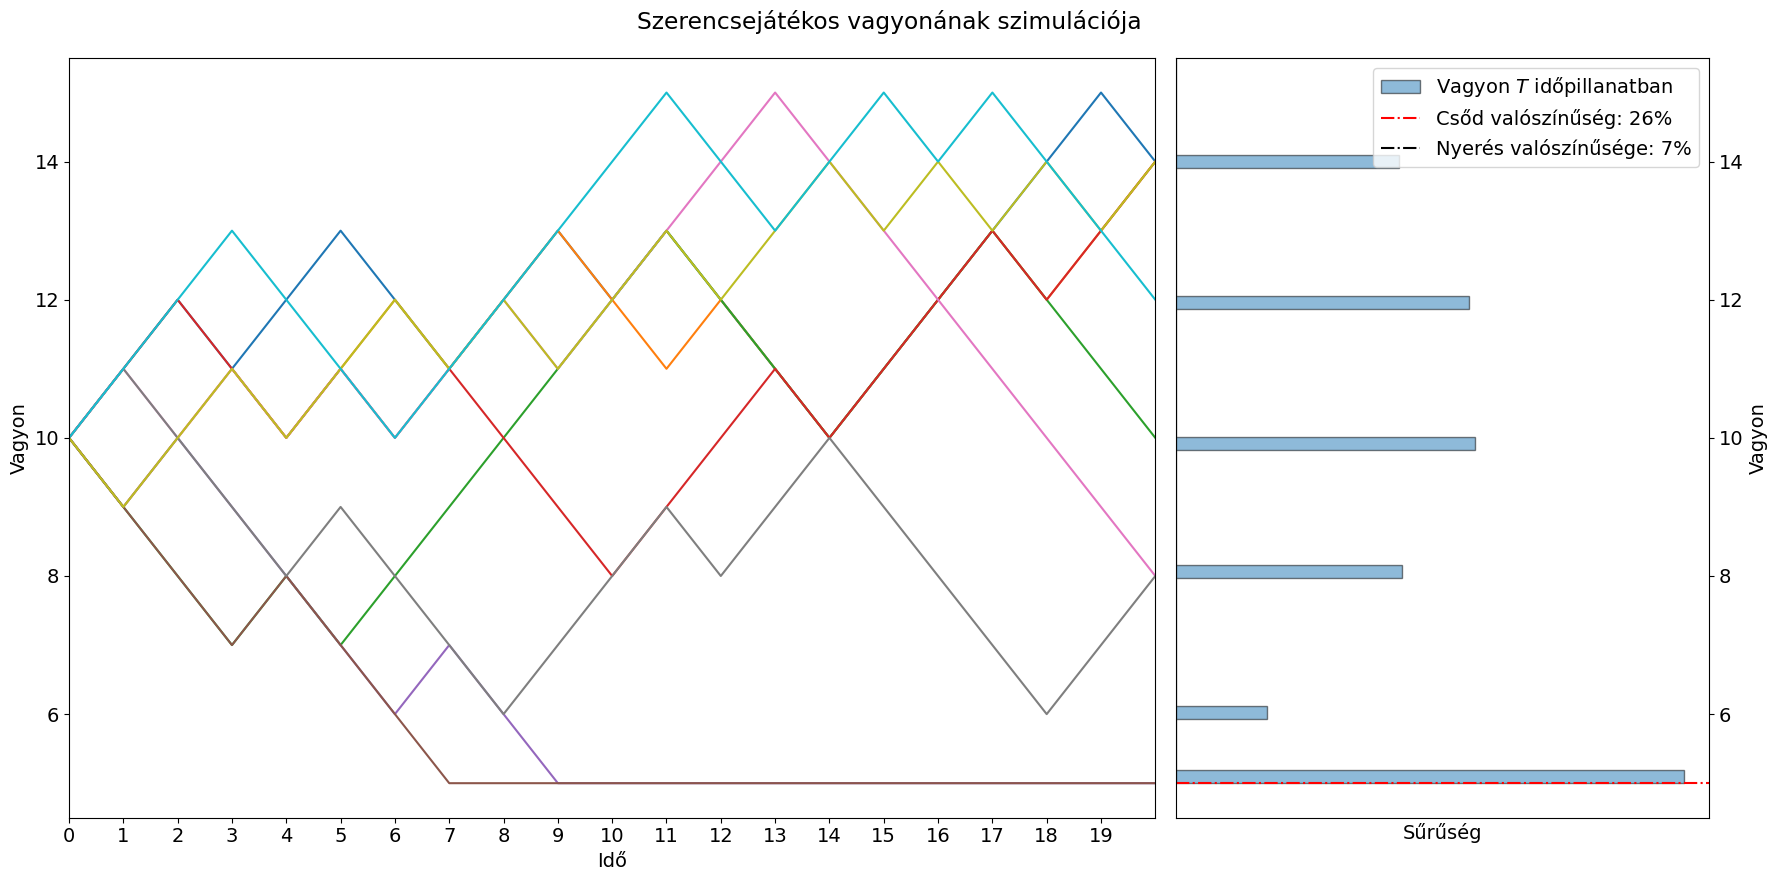

In [12]:
import matplotlib.pyplot as plt

T = ido
plt.clf()
plt.rcParams['figure.figsize'] = (18, 9)
plt.rcParams.update({'font.size': 14})
left = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=2)
S = [ x[-1] for x in uj_bolyongasok ]

for i in range(10):
   left.plot(uj_bolyongasok[i])
ticks = np.arange(0, ido)
plt.xticks(ticks, np.arange(0, T))
plt.margins(x=0)
plt.ylabel('Vagyon')
plt.xlabel('Idő')

    
right = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)
right.hist(S, bins=70, alpha=0.5, ec='black', orientation="horizontal", label='Vagyon $T$ időpillanatban')
if csod > 0:
    plt.axhline(y=K, c='red', ls='-.', label=f'Csőd valószínűség: {int(csod*100)}%')
if nyeres > 0:
    plt.axhline(y=C, c='black', ls='-.', label=f'Nyerés valószínűsége: {int(nyeres*100)}%')
plt.setp(plt.gca(), ylim=left.get_ylim())
plt.ylabel('Vagyon')
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.gca().set_xticks([])
plt.xlabel('Sűrűség')
plt.legend()

plt.subplots_adjust(wspace=0)
plt.gcf().suptitle(f'Szerencsejátékos vagyonának szimulációja')
plt.tight_layout()
plt.show()

In [5]:
ido = 1000
bolyongasok = veletlen_bolyongas(kezdo_pont=x, ido=ido, utvonal_szam=10000)
csod, nyeres, uj_bolyongasok = szerencsejatekos_vagyona(bolyongasok, K=K, C=C)
print(csod, nyeres)

0.6174 0.3826


# Túlélési valószinűség

In [6]:
# véletlen bolyongások szimulálása
x = 10
K = 6
C = 16
ido = 20
bolyongasok = veletlen_bolyongas(kezdo_pont=x, ido=ido, utvonal_szam=10000)
csod, nyeres, uj_bolyongasok = szerencsejatekos_vagyona(bolyongasok, K=K, C=C)

In [7]:
# get some example path
fent = []
koztes = []
lent = []
for i in range(len(bolyongasok)):
    # some inside
    if bolyongasok[i][-1] != C:
        continue
    ez_az_ut = np.array(bolyongasok[i])
    if len(koztes) < 2 and np.all(ez_az_ut > K) and np.all(ez_az_ut <= C):
       koztes.append(i)
    if len(fent) < 2 and np.all(ez_az_ut > K) and np.any(ez_az_ut > C):
       fent.append(i)
    if len(lent) < 2 and np.any(ez_az_ut < K):
       lent.append(i)
print(lent, koztes, fent)

[] [8, 65] [16, 55]


In [8]:
bolyongaso_tukor = veletlen_bolyongas(kezdo_pont=2, ido=ido, utvonal_szam=10000)
tukor_index = []
for i in range(len(bolyongaso_tukor)):
    # some inside
    if bolyongaso_tukor[i][-1] != C:
        continue
    elif len(tukor_index) < 4:
        tukor_index.append(i)
    else:
        break
tukor_index

[2959, 3417, 4752, 5398]

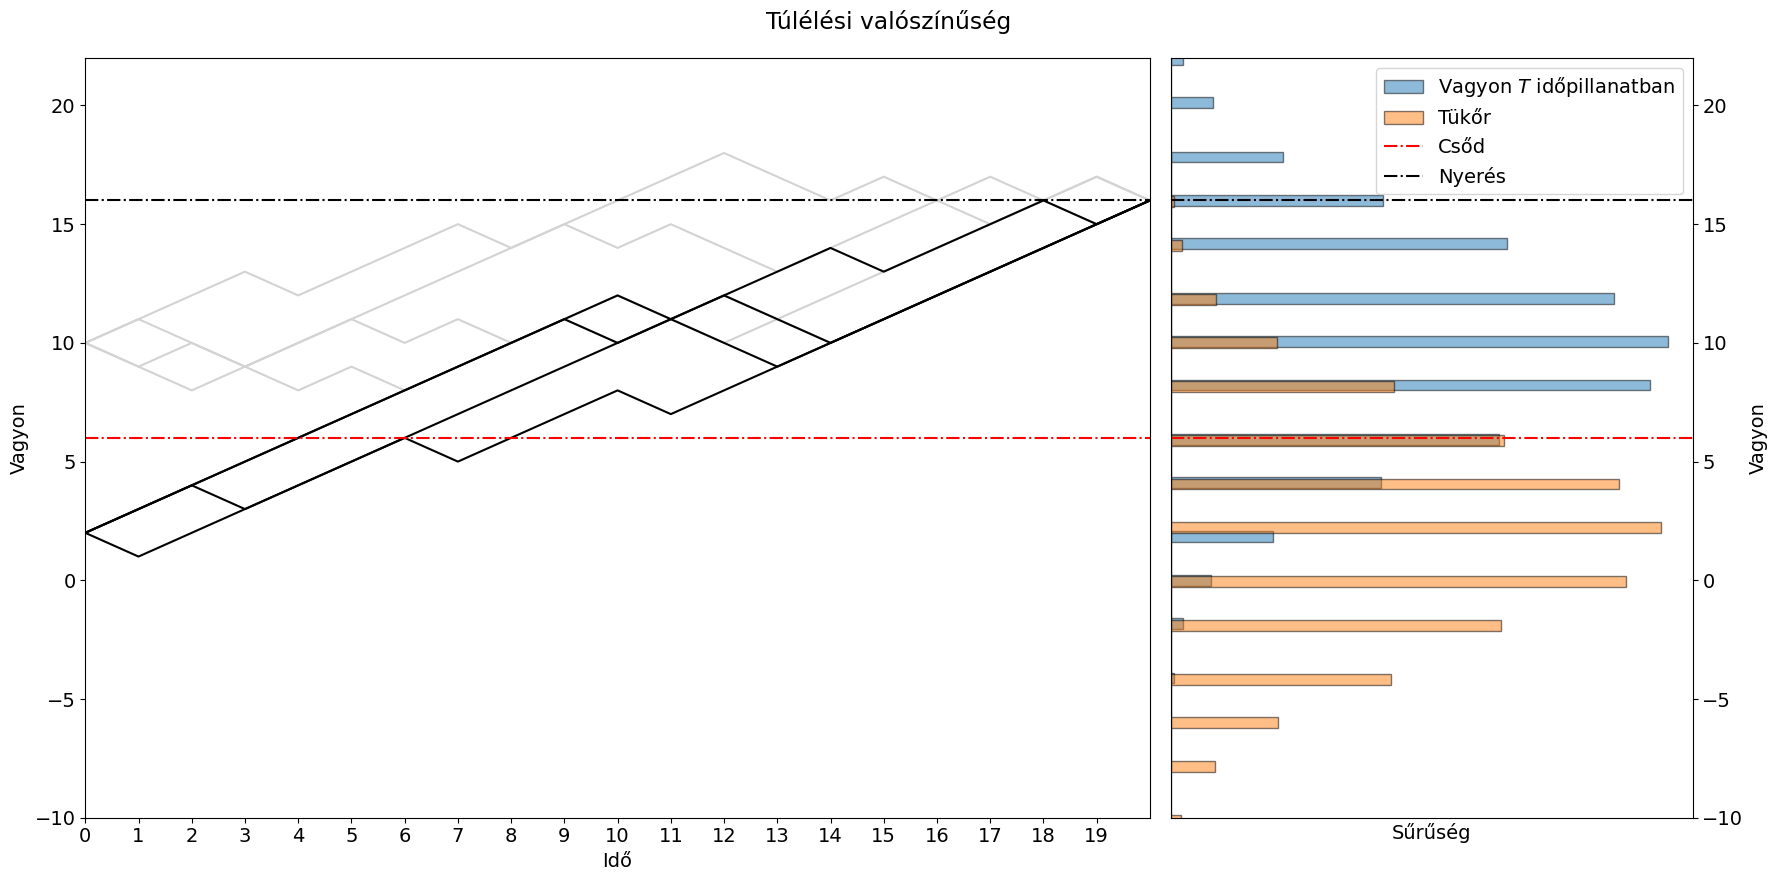

In [9]:
import matplotlib.pyplot as plt

T = ido
plt.clf()
plt.rcParams['figure.figsize'] = (18, 9)
plt.rcParams.update({'font.size': 14})
left = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=2)
S = [ x[-1] for x in bolyongasok ]
S_tukor = [ x[-1] for x in bolyongaso_tukor]

for i in fent + koztes:
   left.plot(bolyongasok[i], color="lightgrey")
for i in tukor_index:
   left.plot(bolyongaso_tukor[i], color="black")
for i in lent:
   left.plot(bolyongasok[i], color="red")
ticks = np.arange(0, ido)
plt.xticks(ticks, np.arange(0, T))
plt.margins(x=0)
plt.ylim([-10, 22])
plt.axhline(y=K, c='red', ls='-.')
plt.axhline(y=C, c='black', ls='-.')
plt.ylabel('Vagyon')
plt.xlabel('Idő')

    
right = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)
right.hist(S, bins=70, alpha=0.5, ec='black', orientation="horizontal", label='Vagyon $T$ időpillanatban')
right.hist(S_tukor, bins=70, alpha=0.5, ec='black', orientation="horizontal", label='Tükőr')
if csod > 0:
    plt.axhline(y=K, c='red', ls='-.', label=f'Csőd')
if nyeres > 0:
    plt.axhline(y=C, c='black', ls='-.', label=f'Nyerés')
plt.setp(plt.gca(), ylim=left.get_ylim())
plt.ylabel('Vagyon')
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.gca().set_xticks([])
plt.xlabel('Sűrűség')
plt.legend()

plt.subplots_adjust(wspace=0)
plt.gcf().suptitle(f'Túlélési valószínűség')
plt.tight_layout()
plt.show()